Nama : Putu Padmanaba

Email : naba17092004@gmail.com

Domisili : Denpasar, Bali

Beasiswa : IDcamp Indosat

#Data Collection

Dataset ini diambil dari: https://www.kaggle.com/datasets/mssmartypants/water-quality

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import zipfile

####Instal Package Kaggle

In [19]:
 ! pip install -q kaggle

####Upload Json Profile Kaggle

In [20]:
 from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"putupadmanaba231","key":"a0c321c2e51112cd6571364aced73f93"}'}

####Membuat direktori dan mengatur izin agar bisa memasukan JSON Kaggle

In [21]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


####Mendownload Dataset

In [22]:
!kaggle datasets download -d mssmartypants/water-quality

water-quality.zip: Skipping, found more recently modified local copy (use --force to force download)


####Ekstrak Zipfile

In [23]:
local_zip = '/content/water-quality.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

####Memuat dataset ke dalam Pandas Dataframe

In [24]:
df = pd.read_csv("waterQuality1.csv")
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


#Data Understanding

####Mengecek informasi dari dataset

In [25]:
df.shape

(7999, 21)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [27]:
df['ammonia'].head()

0     9.08
1    21.16
2    14.02
3    11.33
4    24.33
Name: ammonia, dtype: object

#### Mengubah kolom "ammonia" menjadi tipe float64

In [28]:
df['ammonia'] = pd.to_numeric(df['ammonia'], errors='coerce')

####Mengecek missing value

In [29]:
df.isnull().sum()

aluminium      0
ammonia        3
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

####Mengecek statistik dari data

In [30]:
df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7996.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,14.278212,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,8.878930,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,22.132500,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


#### Mengecek keseimbangan dataset berdasarkan target class

Text(0.5, 1.0, 'Safe drinking water ratio ')

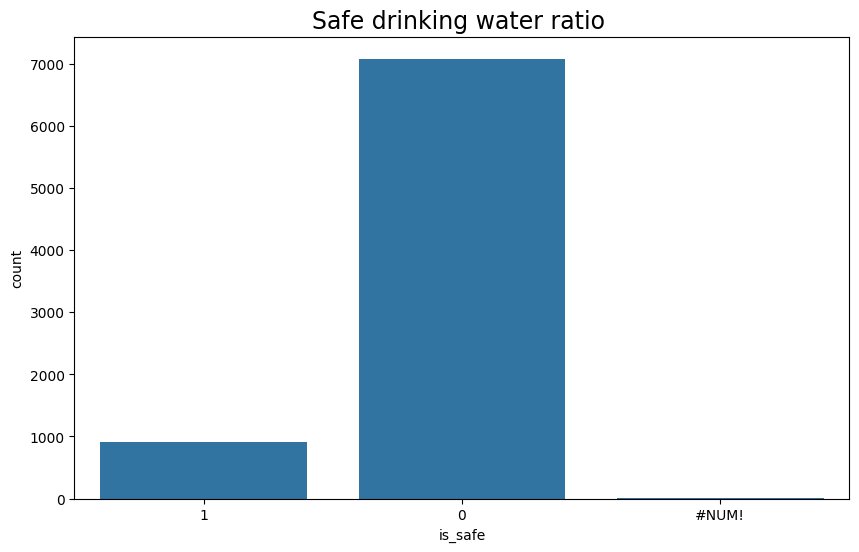

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(df,x="is_safe")
plt.title("Safe drinking water ratio ", size =17)

####Melihat korelasi antar features

<ipython-input-32-1291fdbe2c68>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corrmat = df.corr()


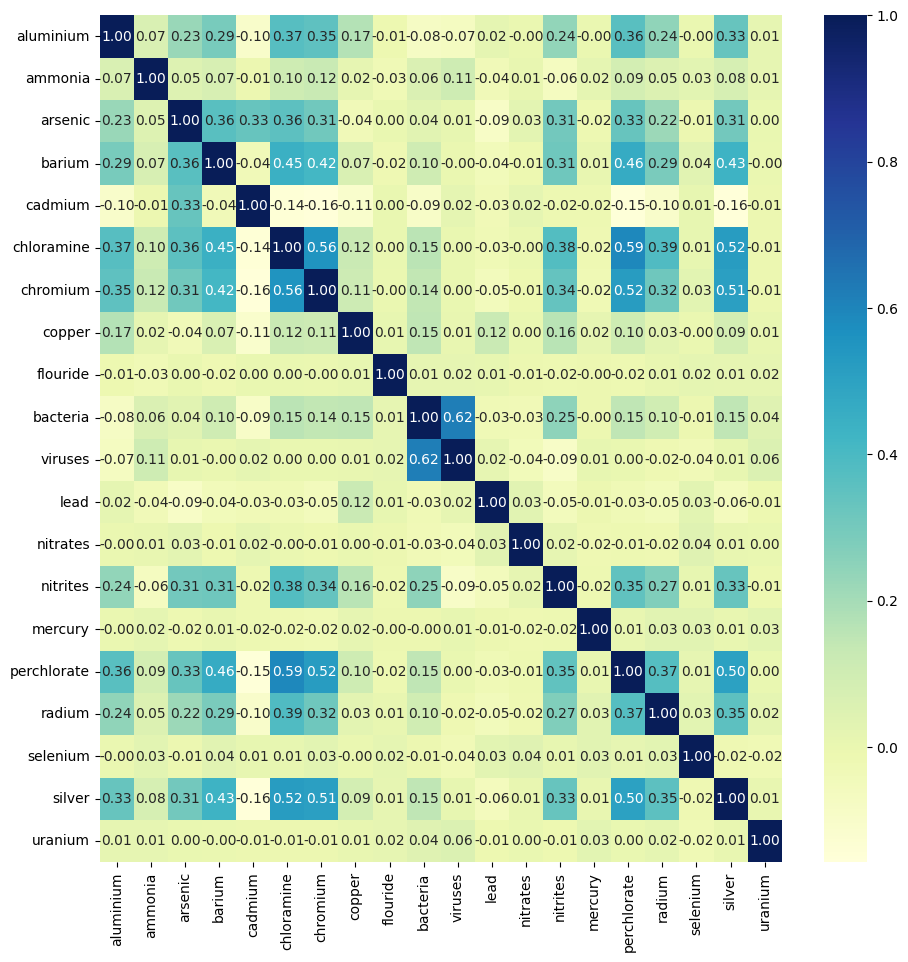

In [32]:
Corrmat = df.corr()
plt.subplots(figsize=(11,11))
sns.heatmap(Corrmat, cmap="YlGnBu", annot=True, fmt='.2f')
plt.show()

#Data preparation

####Menangani missing value

In [33]:
df = df.dropna()

In [34]:
df.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [35]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

#### Menyeimbangkan dataset dengan metode downsampling

In [36]:
from sklearn.utils import resample

In [37]:
jumlah = df[df['is_safe'] == '1'].count()
jumlah

aluminium      912
ammonia        912
arsenic        912
barium         912
cadmium        912
chloramine     912
chromium       912
copper         912
flouride       912
bacteria       912
viruses        912
lead           912
nitrates       912
nitrites       912
mercury        912
perchlorate    912
radium         912
selenium       912
silver         912
uranium        912
is_safe        912
dtype: int64

In [38]:
sample_0 = df[df['is_safe']=='0']
sample_1 = df[df['is_safe']=='1']

In [39]:
downsample_0 = resample(
    sample_0,
    replace = True,
    n_samples = 912,
    random_state=42
)
downsample_1 = resample(
    sample_1,
    replace = True,
    n_samples = 912,
    random_state=42
)

In [40]:
df_downsample = pd.concat([downsample_0,downsample_1])
df_downsample.shape

(1824, 21)

####Membagi dataset menjadi training set dan test set

In [41]:
from sklearn.model_selection import train_test_split

X = df_downsample.drop(['is_safe'],axis=1)
y = df_downsample['is_safe']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=1)

#mengecek jumlah dataset
print(X_train.shape)
print(X_test.shape)

(1368, 20)
(456, 20)


####Standarisasi

In [42]:
from sklearn.preprocessing import StandardScaler

features = ['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium']
scaler = StandardScaler()
scaler.fit(X_train.loc[:, features])
X_train_scaled = scaler.transform(X_train.loc[:, features])
X_train.loc[:, features] = X_train_scaled
X_train.head()


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
1881,-0.608991,0.814788,2.343968,-0.340390,2.103476,-0.237405,-0.207897,0.016168,0.708333,0.079473,-0.756291,-0.265896,-0.552491,0.587176,-1.270277,0.254302,0.698985,0.411630,-0.822696,-1.178450
1910,-0.066722,0.051974,2.385918,0.997928,1.272517,-0.653364,0.180054,-0.867912,1.460699,0.079473,-0.758985,-0.853167,-0.195683,0.264910,-0.593982,0.905764,-1.025461,-0.624134,0.189094,-0.069193
6625,-0.716106,-1.591365,-0.340845,-0.729719,-0.389401,-1.030448,-0.913262,-0.573219,1.225585,0.323102,-0.756291,0.062285,-1.379717,0.530305,-1.270277,-0.852580,1.493881,-0.624134,-0.620338,1.409815
5212,-0.736190,-0.711994,-0.592547,-1.216380,0.164572,-0.906049,-0.983798,1.737797,-0.020521,-0.955948,1.628413,0.027740,0.588939,-2.332171,1.096754,-0.420685,1.441757,-0.969388,-0.822696,-0.069193
937,0.689777,0.932499,-0.382796,1.833363,-0.860277,0.602287,0.250590,-1.023014,-1.572275,-0.955948,-0.769763,-1.267712,-0.788588,0.909441,0.758607,-0.079271,1.941282,0.756885,0.931074,-1.548202


In [43]:
X_train.describe().round(3)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,1368.000,1368.000,1368.000,1368.000,1368.000,1368.000,1368.000,1368.000,1368.000,1368.000,1368.000,1368.000,1368.000,1368.000,1368.000,1368.000,1368.000,1368.000,1368.000,1368.000
mean,0.000,0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-0.763,-1.620,-0.593,-1.395,-0.943,-1.058,-1.090,-1.271,-1.854,-0.956,-0.770,-1.700,-1.648,-2.598,-1.608,-1.082,-1.299,-1.660,-1.093,-1.548
25%,-0.723,-0.852,-0.509,-0.876,-0.805,-0.976,-0.878,-1.070,-0.796,-0.956,-0.767,-0.870,-0.909,-0.531,-0.932,-0.888,-0.921,-0.969,-0.755,-0.809
50%,-0.679,-0.027,-0.425,-0.186,-0.666,-0.263,-0.384,-0.092,0.027,-0.316,-0.751,0.054,-0.032,0.142,0.082,-0.360,-0.198,0.066,-0.485,-0.069
75%,0.723,0.839,-0.215,0.781,0.719,0.860,0.824,0.900,0.849,0.871,0.982,0.840,0.859,0.739,0.759,0.736,0.732,0.757,0.729,1.040
max,2.584,1.828,3.728,2.442,2.657,2.317,2.085,1.831,1.672,2.089,1.925,1.738,1.856,2.578,1.773,2.502,2.145,1.793,2.280,1.780


#Modeling

####Normalisasi dataset test

In [44]:
from sklearn.preprocessing import StandardScaler

features = ['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine', 'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium', 'silver', 'uranium']
scaler = StandardScaler()
scaler.fit(X_test.loc[:, features])
X_test_scaled = scaler.transform(X_test.loc[:, features])
X_test.loc[:, features] = X_test_scaled
X_test.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
3551,-0.749165,-1.480694,3.257008,0.541975,2.283349,0.777620,-0.582691,-1.225244,1.527419,1.316673,1.234048,-1.694087,-0.560651,1.134940,1.191383,0.426242,1.380798,1.349181,0.373127,0.643589
145,1.035777,1.628308,-0.522015,1.193460,-0.800727,-0.660092,-0.618535,1.309186,0.568274,-0.129562,-0.772776,1.351930,-0.544222,0.836708,0.856030,-0.036405,-0.178570,0.673479,1.486904,-1.195237
1148,-0.127444,-0.553364,0.181059,0.411678,-0.598965,1.905613,-0.403474,0.587257,0.755424,-0.991149,-0.783537,0.031989,-0.870981,0.280007,0.520678,0.187359,0.545727,-1.353626,1.552420,1.011355
502,2.265850,0.060082,-0.390189,0.501258,-0.858373,-0.598913,1.675443,-0.733718,-0.858747,0.393544,-0.780846,-1.152573,0.118423,0.021539,-0.150026,-1.057253,0.818403,-0.002223,1.028290,0.643589
4604,-0.755850,0.020697,-0.170478,-0.044361,-0.887197,-1.038638,-0.869438,-1.194523,-1.513773,-0.991149,1.906576,-0.018778,0.994648,-1.549152,0.185326,-0.958071,-0.481071,1.349181,-0.871683,1.379120


####Liblary untuk metrix evaluasi model

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

####Dataframe untuk analisis akurasi model

In [46]:
models = pd.DataFrame(index=['accuracy', 'precision', 'recall', 'f1_score'],
                      columns=['KNN', 'SVM', 'Randomforest'])

####KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=25)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=25)

####SVC

In [48]:
from sklearn.svm import SVC

svc = SVC(C=5)
svc.fit(X_train,y_train)

SVC(C=5)

####Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=110,max_depth=16, random_state=123, n_jobs=1)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=16, n_estimators=110, n_jobs=1,
                       random_state=123)

#Evaluasi model

####Menghitung matrix evaluasi model

In [50]:
# KNN
models.loc['accuracy', 'KNN'] = accuracy_score(y_pred=knn.predict(X_test),y_true=y_test)
models.loc['recall', 'KNN'] = recall_score(y_pred=knn.predict(X_test),y_true=y_test,pos_label='1')
models.loc['precision', 'KNN'] = precision_score(y_pred=knn.predict(X_test),y_true=y_test,pos_label='1')
models.loc['f1_score', 'KNN'] = f1_score(y_pred=knn.predict(X_test),y_true=y_test,pos_label='1')
# SVC
models.loc['accuracy', 'SVM'] = accuracy_score(y_pred=svc.predict(X_test),y_true=y_test)
models.loc['recall', 'SVM'] = recall_score(y_pred=svc.predict(X_test),y_true=y_test,pos_label='1')
models.loc['precision', 'SVM'] = precision_score(y_pred=svc.predict(X_test),y_true=y_test,pos_label='1')
models.loc['f1_score', 'SVM'] = f1_score(y_pred=svc.predict(X_test),y_true=y_test,pos_label='1')
# RandomForest
models.loc['accuracy', 'Randomforest'] = accuracy_score(y_pred=rf.predict(X_test),y_true=y_test)
models.loc['recall', 'Randomforest'] = recall_score(y_pred=rf.predict(X_test),y_true=y_test,pos_label='1')
models.loc['precision', 'Randomforest'] = precision_score(y_pred=rf.predict(X_test),y_true=y_test,pos_label='1')
models.loc['f1_score', 'Randomforest'] = f1_score(y_pred=rf.predict(X_test),y_true=y_test,pos_label='1')

####Menanpilkan hasil evaluasi model

In [51]:
models

,KNN,SVM,Randomforest
accuracy,0.813596,0.905702,0.910088
precision,0.757679,0.903766,0.980296
recall,0.940678,0.915254,0.84322
f1_score,0.839319,0.909474,0.906606
